### Creating A heat map

**Heat Map**  heat maps are used as an indicator of the scope and frequency of a player's movement, helping the sports analysts to identify playing conditions and in-game situations of players. 

##### Data:
for this use case I used data that I generated from an extended highlights video on yotube for Luka Modric's game against Iiverpool in 2022 the UCL Final.
The dataset has been generated using Video Event Tagger developped by fcpython.com


#### Importing library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mplsoccer.pitch import Pitch
import cmasher as cmr

#### Importing data

In [3]:
passes=pd.read_csv("events.csv")
passes.head(5)

,Team,Player,Event,Mins,Secs,X,Y,end_x,end_y,outcome
0,Home,Modric,Pass,0,25,19,34,29,20,unsuccessful
1,Home,Modric,Pass,0,31,30,84,9,55,successful
2,Home,Modric,Pass,0,33,63,17,70,6,successful
3,Home,Modric,Pass,0,39,30,67,24,83,successful
4,Home,Modric,Pass,0,42,20,83,41,41,successful


##### Adjusting the coordinates to align with the statsbomb pitch dimensions

In [4]:
passes["X"]=passes["X"]*1.2
passes["end_x"]=passes["end_x"]*1.2
passes["Y"]=passes["Y"]*0.8
passes["end_y"]=passes["end_y"]*0.8
passes.head(5)

,Team,Player,Event,Mins,Secs,X,Y,end_x,end_y,outcome
0,Home,Modric,Pass,0,25,22.8,27.2,34.8,16.0,unsuccessful
1,Home,Modric,Pass,0,31,36.0,67.2,10.8,44.0,successful
2,Home,Modric,Pass,0,33,75.6,13.6,84.0,4.8,successful
3,Home,Modric,Pass,0,39,36.0,53.6,28.8,66.4,successful
4,Home,Modric,Pass,0,42,24.0,66.4,49.2,32.8,successful


#### plotting the map

Text(0.5, 1.0, 'Modric HeatMap VS. Liverpool UCL final 2022 (first half)')

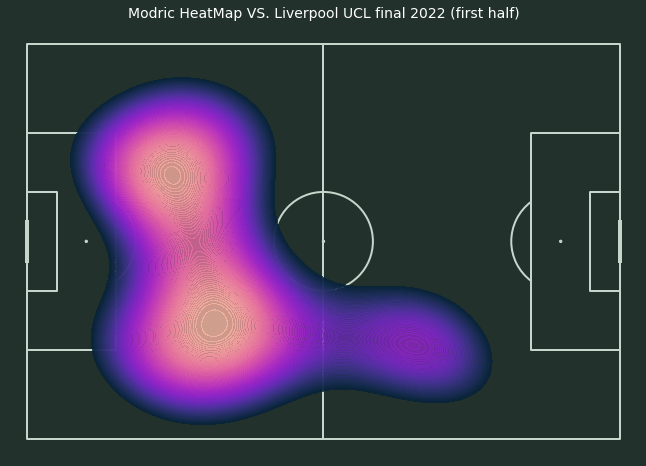

In [13]:
# setting up the canvas
fig ,ax = plt.subplots(figsize=(13.5,8))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

#Plotting the pitch
pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True)
pitch.draw(ax=ax)

# plotting the map
cmap = cmr.bubblegum
kdeplot = pitch.kdeplot(passes.X, passes.Y, ax=ax, cmap=cmap, shade=True, levels=100,alpha=0.8,thresh=0.3)

plt.title("Modric HeatMap VS. Liverpool UCL final 2022 (first half)",color="white",size=14)

The heat map shows where modrich positioned himself during the game but it's not very accurate because we only considered the passes attempts out of all other events and actions during the games due to the data limitations